In [217]:
import matplotlib.pyplot as plt
import numpy as np
import math

plt.style.use('seaborn-whitegrid')

$
Варіант 2. \\
\left\{
    \begin{array}\\
        6.2x_1 + 6.6x_2 = 83 \\
        -9.6x_1 + 13.8x_2 = 72 \\
        -13.2x_1 + 5.7x_2 = 305
    \end{array}
\right.
$

In [218]:
%matplotlib inline
params = [
    {
        "f":lambda x: (83 - 6.2 * x) / 6.6,
        "color":"#48D1CC",
        "line":":",
        "title":"$6.2x_1 + 6.6x_2 = 83$",
    },
    {
        "f":lambda x: (72 + 9.6 * x) / 13.8,
        "color":"#FF4500",
        "line":"--",
        "title":"$-9.6x_1 + 13.8x_2 = 72$"
    },
    {
        "f":lambda x: (305 + 13.2 * x) / 5.7,
        "color":"#F0E68C",
        "line":"-.",
        "title":"$-13.2x_1 + 5.7x_2 = 305$"
    }
]
x = np.linspace(-40, 10, 400)

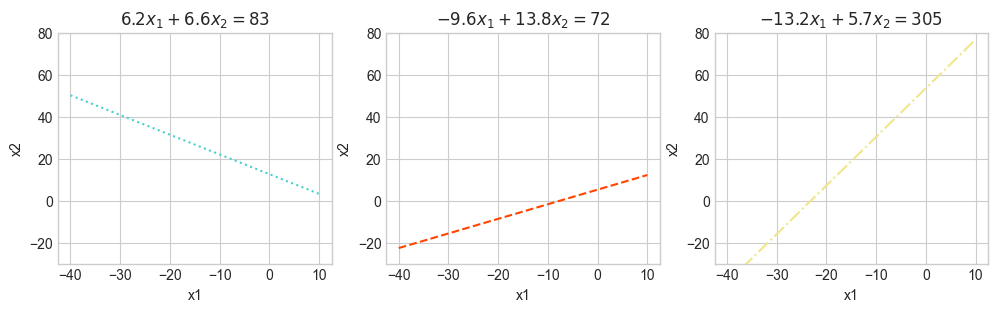

In [219]:
fig, ax = plt.subplots(nrows=1, ncols=len(params), figsize=(12, 3))

for i, param in enumerate(params):
    ax[i].plot(x, param["f"](x), linestyle=param["line"], color=param["color"])
    ax[i].set_ylim(-30, 80)
    ax[i].set_title(param["title"])
    ax[i].set_xlabel("x1")
    ax[i].set_ylabel("x2")
fig.savefig(f"images/plots.jpg")
fig.savefig(f"images/plots.png")
fig.savefig(f"images/plots.svg")

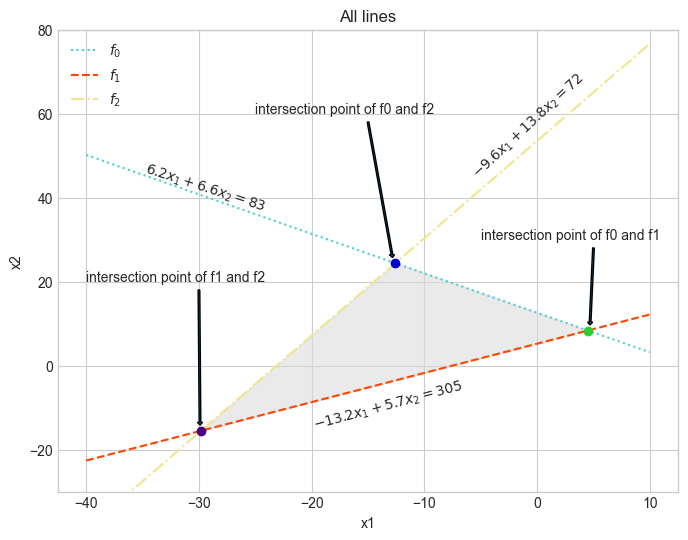

In [226]:
def intersect(x, f1, f2):
    s = np.vstack([
        [x[0], f1(x[0])], [x[len(x)-1], f1(x[len(x)-1])],
        [x[0], f2(x[0])], [x[len(x)-1], f2(x[len(x)-1])]])   
    h = np.hstack((s, np.ones((4, 1))))
    l1 = np.cross(h[0], h[1])       
    l2 = np.cross(h[2], h[3])
    x, y, z = np.cross(l1, l2)   
    
    return (x/z, y/z)

#configurete figure
fig = plt.figure()
fig.set_size_inches(8, 6)
fig.set_dpi(100)

# draw lines
for i, param in enumerate(params):
    plt.plot(x, param["f"](x), linestyle=param["line"], color=param["color"], label=f"$f_{i}$")

#set lines names    
plt.text(-35,37 , params[0]["title"], rotation=-18)
plt.text(-6,45 , params[1]["title"], rotation=43)
plt.text(-20,-15 , params[2]["title"], rotation=15)

#draw intersection points
f0_f1 = intersect(x, params[0]["f"], params[1]["f"])
plt.plot(f0_f1[0], f0_f1[1], "o", color="#32CD32")
plt.text(-5, 30 , "intersection point of f0 and f1")
plt.arrow(5, 28, f0_f1[0] - 4.8, f0_f1[1] - 26, width=0.15)

f1_f2 = intersect(x, params[1]["f"], params[2]["f"])
plt.plot(f1_f2[0], f1_f2[1], "o", color="#4B0082")
plt.text(-40, 20 , "intersection point of f1 and f2")
plt.arrow(-30, 18, f1_f2[0] + 29.9, f1_f2[1] - 16, width=0.15)

f0_f2 = intersect(x, params[0]["f"], params[2]["f"])
plt.plot(f0_f2[0], f0_f2[1], "o", color="#0000CD")
plt.text(-25, 60 , "intersection point of f0 and f2")
plt.arrow(-15, 58, f0_f2[0] + 14.7, f0_f2[1] - 56, width=0.15)

#fill area
f3 = np.minimum(params[0]["f"](x), params[2]["f"](x))
f1 = params[1]["f"](x)
plt.fill_between(x, f1, f3, where=(f1 < f3), color="#DCDCDC", alpha=0.6)

#configurete plot
plt.grid(True)
plt.ylim(-30, 80)
plt.title("All lines")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

#save images
fig.savefig(f"images/all-in-one.jpg")
fig.savefig(f"images/all-in-one.png")
fig.savefig(f"images/all-in-one.svg")